##VGG Net

In this project we are taking the pre-trained VGG16 model and implement it on our own dataset. However, we have excluded the top layer of the pre-trained VGG16 and finetuned those layers. This is known as the transfer learning technique where we take a model from outside which has been trained on large datasets i.e. we take the layers of that model with the trained parameters and use the skeleton to fit our own dataset. This generates a high training and validation accuracy for our own model.

Here we have used the catdog dataset.

In [1]:
# downloading the data from google drive

import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: /content/catdog.zip
100%|██████████| 9.09M/9.09M [00:00<00:00, 11.7MB/s]


'catdog.zip'

In [2]:
!unzip catdog.zip

Archive:  catdog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/cat.2405.jpg  
  inflating: train/Cat/cat.2406.jpg  
  inflating: train/Cat/cat.2436.jpg  
  inflating: train/Cat/cat.2437.jpg  
  inflating: train/Cat/cat.2438.jpg  
  inflating: train/Cat/cat.2439.jpg  
  inflating: train/Cat/cat.2440.jpg  
  inflating: train/Cat/cat.2441.jpg  
  inflating: train/Cat/cat.2442.jpg  
  inflating: train/Cat/cat.2443.jpg  
  inflating: train/Cat/cat.2444.jpg  
  inflating: train/Cat/cat.2445.jpg  
  inflating: train/Cat/cat.2446.jpg  
  inflating: train/Cat/cat.2447.jpg  
  inflating: train/Cat/cat.2448.jpg  
  inflating: train/Cat/cat.2449.jpg  
  inflating: train/Cat/cat.2450.jpg  
  inflating: train/Cat/cat.2451.jpg  
  inflating: train/Cat/cat.2452.jpg  
  inflating: train/Cat/cat.2453.jpg  
  inflating: train/Cat/cat.2454.jpg  
  inflating: train/Cat/

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input  ## Importing the pre-trained VGG16 model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

In [14]:
## Setting the path of the training and validation data
train_directory = '/content/train'
valid_directory = '/content/validation'



## Loading the VGG16 model excluding the top layer as those layers will be finetuned in this project
vgg_model = VGG16(
    weights='imagenet', ## using the imagenet weights

    include_top=False, ## exclusing the top layer of the VGG16 model

    input_shape=(224,224,3) ## this is the input shape that the VGG16 will accept

)


## Freezing the 'vgg_model' i.e. we are not going to train the model but use the pre-trained weights and biases of the VGG16 model (transfer learning)
for layer in vgg_model.layers:
  layer.trainable = False


## Creating a new model
model = Sequential()

## Adding the layers of the 'vgg_model' in our model
model.add(vgg_model)

## Adding custom layers at the top of our model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(125, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


## Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Image Data Generation (Data Augmentation) and Preprocessing the training and validation data
training_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_data_generator = training_gen.flow_from_directory(
                        train_directory,
                        target_size=(224,224),
                        batch_size=16,
                        class_mode='binary'
                        )

valid_data_generator = validation_gen.flow_from_directory(
                        valid_directory,
                        target_size=(224,224),
                        batch_size=16,
                        class_mode='binary'
                        )


## Model training
history = model.fit(train_data_generator, batch_size=16,
          epochs=5,
          validation_data=valid_data_generator)


## Saving the model
model.save('dog_cat_classifier_model.h5')


Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Epoch 1/5
22/22 [==============================] - 218s 10s/step - loss: 0.5921 - accuracy: 0.7300 - val_loss: 0.4728 - val_accuracy: 0.8136
Epoch 2/5
22/22 [==============================] - 215s 10s/step - loss: 0.3080 - accuracy: 0.8546 - val_loss: 0.1986 - val_accuracy: 0.9153
Epoch 3/5
22/22 [==============================] - 216s 10s/step - loss: 0.1723 - accuracy: 0.9466 - val_loss: 0.1792 - val_accuracy: 0.9153
Epoch 4/5
22/22 [==============================] - 216s 10s/step - loss: 0.1454 - accuracy: 0.9466 - val_loss: 0.1744 - val_accuracy: 0.9153
Epoch 5/5
22/22 [==============================] - 215s 10s/step - loss: 0.1006 - accuracy: 0.9614 - val_loss: 0.1654 - val_accuracy: 0.9322


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               6422784   
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 125)               32125     
                                                      

In [16]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.592064,0.729970,0.472778,0.813559
1,0.308000,0.854599,0.198550,0.915254
2,0.172348,0.946588,0.179151,0.915254
3,0.145412,0.946588,0.174364,0.915254
4,0.100619,0.961424,0.165367,0.932203


<Axes: >

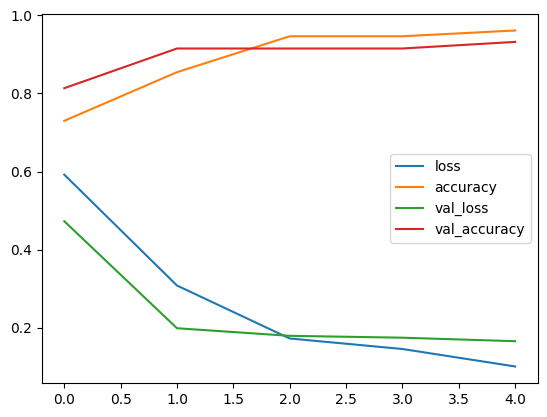

In [17]:
pd.DataFrame(history.history).plot()

So we got an excellent validation accuracy of 93%. Now this model can be used to predict the labels of similar images.